In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("seaborn")

In [2]:
X = pd.read_csv("./train_X_p1.csv")
Y = pd.read_csv("./train_Y_p1.csv", header=None)

In [3]:
X.corr()

,Student ID,University ranking,Student's University dropout rate,SOP rating,CGPA,ZIP Code,GRE,Employed,Strong LOR,Have non academic activities,Been abroad
Student ID,1.000000,-0.003105,-0.003818,0.006704,-0.013386,0.022182,-0.027276,0.011875,-0.014700,-0.017026,0.009724
University ranking,-0.003105,1.000000,0.994116,0.006379,-0.046847,-0.034240,-0.057153,0.003063,0.009401,-0.004329,0.011988
Student's University dropout rate,-0.003818,0.994116,1.000000,0.034219,-0.057881,-0.034816,-0.061246,0.001947,0.006459,-0.003808,0.011976
SOP rating,0.006704,0.006379,0.034219,1.000000,-0.192791,-0.011130,-0.144157,-0.006577,0.020500,-0.016318,-0.012792
CGPA,-0.013386,-0.046847,-0.057881,-0.192791,1.000000,-0.022591,0.639438,-0.015288,0.159691,0.000734,0.013229
ZIP Code,0.022182,-0.034240,-0.034816,-0.011130,-0.022591,1.000000,-0.008149,0.008045,0.022321,0.007197,0.018058
GRE,-0.027276,-0.057153,-0.061246,-0.144157,0.639438,-0.008149,1.000000,-0.011290,0.117897,0.012409,-0.005405
Employed,0.011875,0.003063,0.001947,-0.006577,-0.015288,0.008045,-0.011290,1.000000,0.272358,-0.004495,0.009837
Strong LOR,-0.014700,0.009401,0.006459,0.020500,0.159691,0.022321,0.117897,0.272358,1.000000,0.329980,0.171183
Have non academic activities,-0.017026,-0.004329,-0.003808,-0.016318,0.000734,0.007197,0.012409,-0.004495,0.329980,1.000000,0.005100


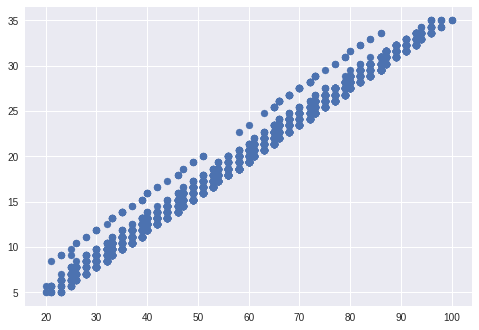

In [4]:
plt.scatter(X["University ranking"], X["Student\'s University dropout rate"])

In [6]:
truth = [False, True, True, True, True, False, True, True, True, True, True]
scale = [2,4,6]
num = int(11**0.5)

In [7]:
scaler = StandardScaler()
ordinal = OrdinalEncoder()

columns = X.columns

In [8]:
for i in columns[scale]:
    k = scaler.fit_transform(X[i].values.reshape(len(X[i]),1))
    X[i] = k
    
X = X[columns[truth]]

In [9]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
svm = SVC()
nb = GaussianNB()
rf = RandomForestClassifier(max_depth=5, max_features=num, n_jobs=4)
dt = DecisionTreeClassifier(max_depth=8)
knn = KNeighborsClassifier()

In [11]:
knn.fit(trainX, np.ravel(trainY))
pred = knn.predict(testX)
accuracy_score(testY, pred)

0.94375

In [12]:
nb.fit(trainX, np.ravel(trainY))
pred = nb.predict(testX)
accuracy_score(testY, pred)

0.8975

In [13]:
svm.fit(trainX, np.ravel(trainY))
pred = svm.predict(testX)
accuracy_score(testY, pred)

0.91375

In [14]:
rf.fit(trainX, np.ravel(trainY))
pred = rf.predict(testX)
accuracy_score(testY, pred)

0.97625

In [15]:
abc = AdaBoostClassifier(base_estimator=rf, n_estimators=50, learning_rate=1.0)
abc.fit(trainX, np.ravel(trainY))
pred = abc.predict(testX)
accuracy_score(testY, pred)

0.9725

In [16]:
dt.fit(trainX, np.ravel(trainY))
pred = dt.predict(testX)
accuracy_score(testY, pred)

0.96875

In [17]:
abc = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=1.0)
abc.fit(trainX, np.ravel(trainY))
pred = abc.predict(testX)
accuracy_score(testY, pred)

0.975

In [18]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('rf', RandomForestClassifier(max_depth=8, max_features=num, n_jobs=4)))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('dt', DecisionTreeClassifier(max_depth=8)))
    level0.append(('svm', SVC()))
    level0.append(('nb', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [19]:
model = get_stacking()

In [20]:
model.fit(trainX, np.ravel(trainY))

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=8,
                                                       max_features=3,
                                                       n_jobs=4)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(max_depth=8)),
                               ('svm', SVC()), ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [21]:
pred = model.predict(testX)
accuracy_score(testY, pred)

0.97375

In [22]:
import pickle

pickle.dump(model, open("MODEL_FILE.sav","wb"))

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

model = pickle.load(open("MODEL_FILE.sav","rb"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

truth = [False, True, True, True, True, False, True, True, True, True, True]
scale = [2,4,6]
trans = [5]
num = int(11**0.5)

X = pd.read_csv("./train_X_p1.csv")
Y = pd.read_csv("./train_Y_p1.csv", header=None)

scaler = StandardScaler()
ordinal = OrdinalEncoder()
columns = X.columns

def preprocess_data(file):
        
    for i in columns[scale]:
        k = scaler.fit(X[i].values.reshape(len(X[i]),1))
        l = k.transform(file[i].values.reshape(len(file[i]),1))
        file[i] = l
        
    return file[columns[truth]]

In [30]:
test_X = preprocess_data(X)

In [31]:

pred = model.predict(test_X)

In [32]:
accuracy_score(Y, pred)

0.983

In [33]:
from matplotlib.animation import writers

In [34]:
dir(writers)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_registered',
 'avail',
 'ensure_not_dirty',
 'is_available',
 'list',
 'register',
 'reset_available_writers',
 'set_dirty']